<a href="https://colab.research.google.com/github/sai-phyo-hein/Hybrid_Transformer_for_Portfolio_Allocation/blob/main/EDA_and_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance -q

### Import necessary libraries

In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (15, 7)

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

### Utility functions to fetch data fron **yfinance**

In [52]:
def get_ticker_data(yf_symbol, start="2014-01-01", end="2024-03-31"):
  df = pdr.get_data_yahoo(yf_symbol, start=start, end=end)
  df['symbol'] = yf_symbol
  return df

def get_market_cap(yf_symbol):
  ticker = yf.Ticker(yf_symbol)
  res = {}
  res[yf_symbol] = ticker.get_info()['marketCap']
  return res

### Metadata about the Nifty 50 stocks.

This file consists of the constituent stocks of current Nifty 50 stocks and its addictional information such as

1. Stock's Industry
2. Code
3. Symbol etc.

In [5]:
nifty_50 = pd.read_csv('/content/ind_nifty50list.csv')
nifty_50.rename(columns={'Company Name': 'company_name', 'Industry': 'industry', 'Symbol': 'symbol',
                         'Series': 'series', 'ISIN Code': 'isin_code'}, inplace=True)

nifty_50['yf_symbol'] = nifty_50['symbol'] + '.NS'
nifty_50.head(5)

,company_name,industry,symbol,series,isin_code,yf_symbol
0,Adani Enterprises Ltd.,Metals & Mining,ADANIENT,EQ,INE423A01024,ADANIENT.NS
1,Adani Ports and Special Economic Zone Ltd.,Services,ADANIPORTS,EQ,INE742F01042,ADANIPORTS.NS
2,Apollo Hospitals Enterprise Ltd.,Healthcare,APOLLOHOSP,EQ,INE437A01024,APOLLOHOSP.NS
3,Asian Paints Ltd.,Consumer Durables,ASIANPAINT,EQ,INE021A01026,ASIANPAINT.NS
4,Axis Bank Ltd.,Financial Services,AXISBANK,EQ,INE238A01034,AXISBANK.NS


### Get historical data for a given ticker

In [6]:
get_ticker_data(nifty_50['yf_symbol'][0])

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-01,40.433960,41.368938,40.204048,41.192673,37.967484,7564701
2014-01-02,40.464615,41.192673,38.824574,39.138786,36.074406,17188171
2014-01-03,38.778587,39.246078,37.475750,38.065861,35.085487,11525782
2014-01-06,37.996887,39.069813,37.506405,38.632977,35.608192,10660990
2014-01-07,38.832237,39.069813,36.939289,37.084900,34.181328,11002957
...,...,...,...,...,...,...
2024-03-21,3089.550049,3107.100098,3059.600098,3066.500000,3066.500000,1175751
2024-03-22,3066.550049,3128.949951,3048.050049,3107.699951,3107.699951,951557
2024-03-26,3100.500000,3171.949951,3089.100098,3109.949951,3109.949951,937103


### Constituent of Nifty 50 index

In [6]:
list_sym = list(nifty_50['yf_symbol'])
list_sym

['ADANIENT.NS',
 'ADANIPORTS.NS',
 'APOLLOHOSP.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'ITC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LTIM.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'NESTLEIND.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SHRIRAMFIN.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

### Fetch the market cap for each of the stocks

In [13]:
nifty_50['market_cap'] = nifty_50['yf_symbol'].apply(lambda x: get_market_cap(x)[x])
nifty_50

,company_name,industry,symbol,series,isin_code,yf_symbol,market_cap
0,Adani Enterprises Ltd.,Metals & Mining,ADANIENT,EQ,INE423A01024,ADANIENT.NS,3512567857152
1,Adani Ports and Special Economic Zone Ltd.,Services,ADANIPORTS,EQ,INE742F01042,ADANIPORTS.NS,2848342409216
2,Apollo Hospitals Enterprise Ltd.,Healthcare,APOLLOHOSP,EQ,INE437A01024,APOLLOHOSP.NS,858159185920
3,Asian Paints Ltd.,Consumer Durables,ASIANPAINT,EQ,INE021A01026,ASIANPAINT.NS,2750586552320
4,Axis Bank Ltd.,Financial Services,AXISBANK,EQ,INE238A01034,AXISBANK.NS,3578894483456
5,Bajaj Auto Ltd.,Automobile and Auto Components,BAJAJ-AUTO,EQ,INE917I01010,BAJAJ-AUTO.NS,2445644660736
6,Bajaj Finance Ltd.,Financial Services,BAJFINANCE,EQ,INE296A01024,BAJFINANCE.NS,4218893369344
7,Bajaj Finserv Ltd.,Financial Services,BAJAJFINSV,EQ,INE918I01026,BAJAJFINSV.NS,2540434358272
8,Bharat Petroleum Corporation Ltd.,Oil Gas & Consumable Fuels,BPCL,EQ,INE029A01011,BPCL.NS,1342331944960
9,Bharti Airtel Ltd.,Telecommunication,BHARTIARTL,EQ,INE397D01024,BHARTIARTL.NS,7923666780160


In [14]:
nifty_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  50 non-null     object
 1   industry      50 non-null     object
 2   symbol        50 non-null     object
 3   series        50 non-null     object
 4   isin_code     50 non-null     object
 5   yf_symbol     50 non-null     object
 6   market_cap    50 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 2.9+ KB


### Number of stocks per Sector

In [15]:
stocks_per_sector = nifty_50['industry'].value_counts().to_frame().reset_index()
stocks_per_sector

,industry,count
0,Financial Services,11
1,Automobile and Auto Components,6
2,Information Technology,6
3,Healthcare,5
4,Fast Moving Consumer Goods,5
5,Metals & Mining,4
6,Oil Gas & Consumable Fuels,4
7,Consumer Durables,2
8,Construction Materials,2
9,Power,2


We see that stocks from "Financial" is the majority contributor to the NITFY 50

### Stock selection process for constructing the portfolio

We have planned to construct an equity portfolio consist of stocks from diverse sector in order to induct "risk diversification". Below are the steps in selecting the stocks for the "equity portfolio"

1. Select the **top two stocks** from each sector from the NIFTY 50 constituent. Here the top 2 selection is based on the criteria of market capitalization.

2. We will select the stocks directly if its the sole member of a particular sector. For example: Telecommunication sector has just one stock - **Bharti Airtel**. Hence it will be selected implicitly

### Selection of top 2 stocks from each of the Sector

In [17]:
filtered_sectors = stocks_per_sector[stocks_per_sector['count'] > 2]['industry']
filtered_sectors

0                Financial Services
1    Automobile and Auto Components
2            Information Technology
3                        Healthcare
4        Fast Moving Consumer Goods
5                   Metals & Mining
6        Oil Gas & Consumable Fuels
Name: industry, dtype: object

### We select all stocks in the sectors which has atmost only 2 stocks. These stocks will be part of our equity portfolio

In [20]:
stocks_1 = nifty_50[~nifty_50['industry'].isin(filtered_sectors)].reset_index(drop=True)['yf_symbol']
stocks_1

0    ADANIPORTS.NS
1    ASIANPAINT.NS
2    BHARTIARTL.NS
3        GRASIM.NS
4            LT.NS
5          NTPC.NS
6     POWERGRID.NS
7         TITAN.NS
8    ULTRACEMCO.NS
Name: yf_symbol, dtype: object

In [21]:
filtered_df = nifty_50[nifty_50['industry'].isin(filtered_sectors)].reset_index(drop=True)
filtered_df

,company_name,industry,symbol,series,isin_code,yf_symbol,market_cap
0,Adani Enterprises Ltd.,Metals & Mining,ADANIENT,EQ,INE423A01024,ADANIENT.NS,3512567857152
1,Apollo Hospitals Enterprise Ltd.,Healthcare,APOLLOHOSP,EQ,INE437A01024,APOLLOHOSP.NS,858159185920
2,Axis Bank Ltd.,Financial Services,AXISBANK,EQ,INE238A01034,AXISBANK.NS,3578894483456
3,Bajaj Auto Ltd.,Automobile and Auto Components,BAJAJ-AUTO,EQ,INE917I01010,BAJAJ-AUTO.NS,2445644660736
4,Bajaj Finance Ltd.,Financial Services,BAJFINANCE,EQ,INE296A01024,BAJFINANCE.NS,4218893369344
5,Bajaj Finserv Ltd.,Financial Services,BAJAJFINSV,EQ,INE918I01026,BAJAJFINSV.NS,2540434358272
6,Bharat Petroleum Corporation Ltd.,Oil Gas & Consumable Fuels,BPCL,EQ,INE029A01011,BPCL.NS,1342331944960
7,Britannia Industries Ltd.,Fast Moving Consumer Goods,BRITANNIA,EQ,INE216A01030,BRITANNIA.NS,1156130275328
8,Cipla Ltd.,Healthcare,CIPLA,EQ,INE059A01026,CIPLA.NS,1137013424128
9,Coal India Ltd.,Oil Gas & Consumable Fuels,COALINDIA,EQ,INE522F01014,COALINDIA.NS,2793257304064


### Now we pick the top 2 stocks by market cap for those sectors which has more than 2 stocks in it.

In [33]:
df = filtered_df.sort_values(['market_cap'], ascending=False).groupby('industry').head(2).reset_index(drop=True)
df

,company_name,industry,symbol,series,isin_code,yf_symbol,market_cap
0,Reliance Industries Ltd.,Oil Gas & Consumable Fuels,RELIANCE,EQ,INE002A01018,RELIANCE.NS,19825040556032
1,Tata Consultancy Services Ltd.,Information Technology,TCS,EQ,INE467B01029,TCS.NS,14002732138496
2,HDFC Bank Ltd.,Financial Services,HDFCBANK,EQ,INE040A01034,HDFCBANK.NS,11619458351104
3,ICICI Bank Ltd.,Financial Services,ICICIBANK,EQ,INE090A01021,ICICIBANK.NS,8148951760896
4,Infosys Ltd.,Information Technology,INFY,EQ,INE009A01021,INFY.NS,5939793494016
5,ITC Ltd.,Fast Moving Consumer Goods,ITC,EQ,INE154A01025,ITC.NS,5470795857920
6,Hindustan Unilever Ltd.,Fast Moving Consumer Goods,HINDUNILVR,EQ,INE030A01027,HINDUNILVR.NS,5230422392832
7,Maruti Suzuki India Ltd.,Automobile and Auto Components,MARUTI,EQ,INE585B01010,MARUTI.NS,3989726822400
8,Tata Motors Ltd.,Automobile and Auto Components,TATAMOTORS,EQ,INE155A01022,TATAMOTORS.NS,3668179419136
9,Sun Pharmaceutical Industries Ltd.,Healthcare,SUNPHARMA,EQ,INE044A01036,SUNPHARMA.NS,3650820505600


In [36]:
df = df.sort_values(by='industry').reset_index(drop=True)
df

,company_name,industry,symbol,series,isin_code,yf_symbol,market_cap
0,Maruti Suzuki India Ltd.,Automobile and Auto Components,MARUTI,EQ,INE585B01010,MARUTI.NS,3989726822400
1,Tata Motors Ltd.,Automobile and Auto Components,TATAMOTORS,EQ,INE155A01022,TATAMOTORS.NS,3668179419136
2,ITC Ltd.,Fast Moving Consumer Goods,ITC,EQ,INE154A01025,ITC.NS,5470795857920
3,Hindustan Unilever Ltd.,Fast Moving Consumer Goods,HINDUNILVR,EQ,INE030A01027,HINDUNILVR.NS,5230422392832
4,HDFC Bank Ltd.,Financial Services,HDFCBANK,EQ,INE040A01034,HDFCBANK.NS,11619458351104
5,ICICI Bank Ltd.,Financial Services,ICICIBANK,EQ,INE090A01021,ICICIBANK.NS,8148951760896
6,Sun Pharmaceutical Industries Ltd.,Healthcare,SUNPHARMA,EQ,INE044A01036,SUNPHARMA.NS,3650820505600
7,Cipla Ltd.,Healthcare,CIPLA,EQ,INE059A01026,CIPLA.NS,1137013424128
8,Tata Consultancy Services Ltd.,Information Technology,TCS,EQ,INE467B01029,TCS.NS,14002732138496
9,Infosys Ltd.,Information Technology,INFY,EQ,INE009A01021,INFY.NS,5939793494016


In [37]:
stocks_2 = df['yf_symbol']
stocks_2

0         MARUTI.NS
1     TATAMOTORS.NS
2            ITC.NS
3     HINDUNILVR.NS
4       HDFCBANK.NS
5      ICICIBANK.NS
6      SUNPHARMA.NS
7          CIPLA.NS
8            TCS.NS
9           INFY.NS
10      ADANIENT.NS
11      JSWSTEEL.NS
12      RELIANCE.NS
13          ONGC.NS
Name: yf_symbol, dtype: object

The above 14 stocks are the selected out of sectors having multiple stocks in it

In [47]:
final_stock_list = pd.concat([stocks_1, stocks_2], ignore_index=True)
final_stock_list

0     ADANIPORTS.NS
1     ASIANPAINT.NS
2     BHARTIARTL.NS
3         GRASIM.NS
4             LT.NS
5           NTPC.NS
6      POWERGRID.NS
7          TITAN.NS
8     ULTRACEMCO.NS
9         MARUTI.NS
10    TATAMOTORS.NS
11           ITC.NS
12    HINDUNILVR.NS
13      HDFCBANK.NS
14     ICICIBANK.NS
15     SUNPHARMA.NS
16         CIPLA.NS
17           TCS.NS
18          INFY.NS
19      ADANIENT.NS
20      JSWSTEEL.NS
21      RELIANCE.NS
22          ONGC.NS
Name: yf_symbol, dtype: object

Out of 50 stocks in Nifty 50, we have chosen above 23 based on the mentioned criteria

In [53]:
historical_data = []

for i in list(final_stock_list):
  print(f"Fetching historical data for {i}")
  data = get_ticker_data(i)
  historical_data.append(data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Fetching historical data for ADANIPORTS.NS
Fetching historical data for ASIANPAINT.NS
Fetching historical data for BHARTIARTL.NS
Fetching historical data for GRASIM.NS



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching historical data for LT.NS
Fetching historical data for NTPC.NS
Fetching historical data for POWERGRID.NS
Fetching historical data for TITAN.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching historical data for ULTRACEMCO.NS
Fetching historical data for MARUTI.NS
Fetching historical data for TATAMOTORS.NS
Fetching historical data for ITC.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching historical data for HINDUNILVR.NS
Fetching historical data for HDFCBANK.NS
Fetching historical data for ICICIBANK.NS
Fetching historical data for SUNPHARMA.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching historical data for CIPLA.NS
Fetching historical data for TCS.NS
Fetching historical data for INFY.NS
Fetching historical data for ADANIENT.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching historical data for JSWSTEEL.NS
Fetching historical data for RELIANCE.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Fetching historical data for ONGC.NS


In [54]:
len(historical_data)

23

In [62]:
historical_data[13]

,Open,High,Low,Close,Adj Close,Volume,symbol
Date,,,,,,,
2014-01-01,334.000000,334.899994,331.500000,332.575012,309.231567,2246218,HDFCBANK.NS
2014-01-02,332.500000,337.375000,326.774994,328.500000,305.442535,3614496,HDFCBANK.NS
2014-01-03,326.000000,333.000000,325.000000,331.549988,308.278473,3256592,HDFCBANK.NS
2014-01-06,331.500000,331.500000,328.500000,330.850006,307.627594,2981710,HDFCBANK.NS
2014-01-07,333.549988,335.475006,326.649994,332.200012,308.882812,3948460,HDFCBANK.NS
...,...,...,...,...,...,...,...
2024-03-21,1442.599976,1451.250000,1438.300049,1445.750000,1445.750000,14461430,HDFCBANK.NS
2024-03-22,1441.000000,1450.750000,1437.750000,1442.849976,1442.849976,22990163,HDFCBANK.NS
2024-03-26,1427.199951,1437.949951,1422.150024,1425.400024,1425.400024,28422145,HDFCBANK.NS


### Data visualization

In [59]:
adani_ports = historical_data[0].copy()
hdfc = historical_data[13].copy()

In [60]:
adani_ports['log_returns'] = np.log1p(adani_ports['Adj Close'].pct_change())
hdfc['log_returns'] = np.log1p(hdfc['Adj Close'].pct_change())

<Axes: xlabel='Date'>

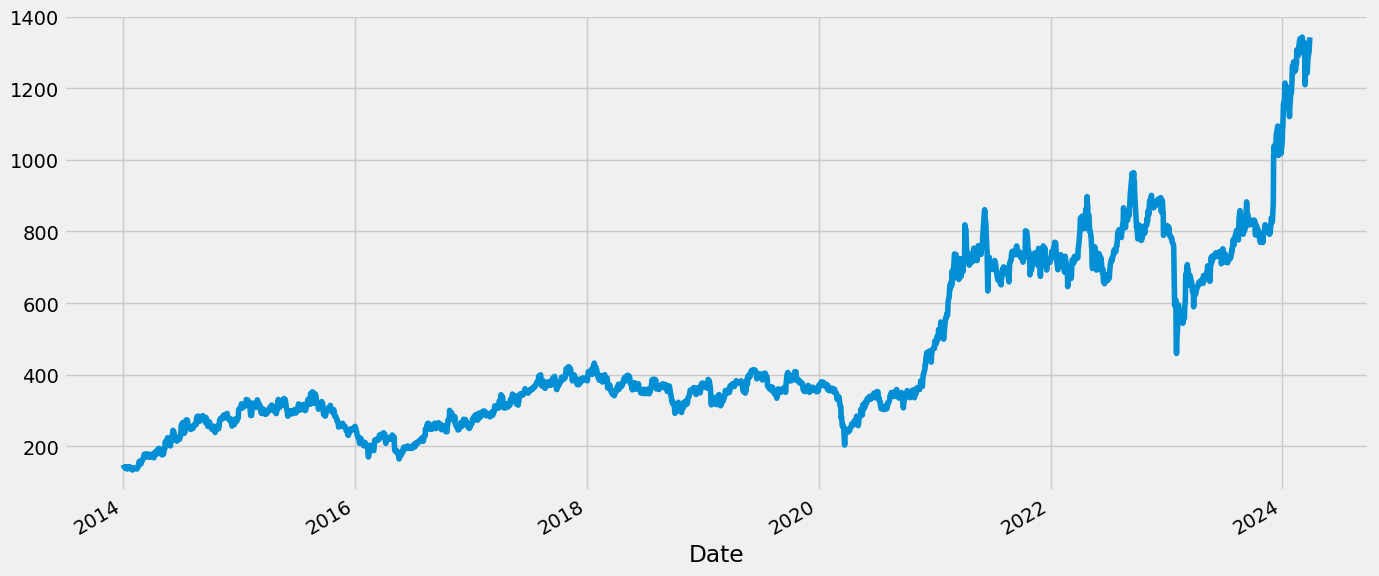

In [65]:
adani_ports['Adj Close'].plot()

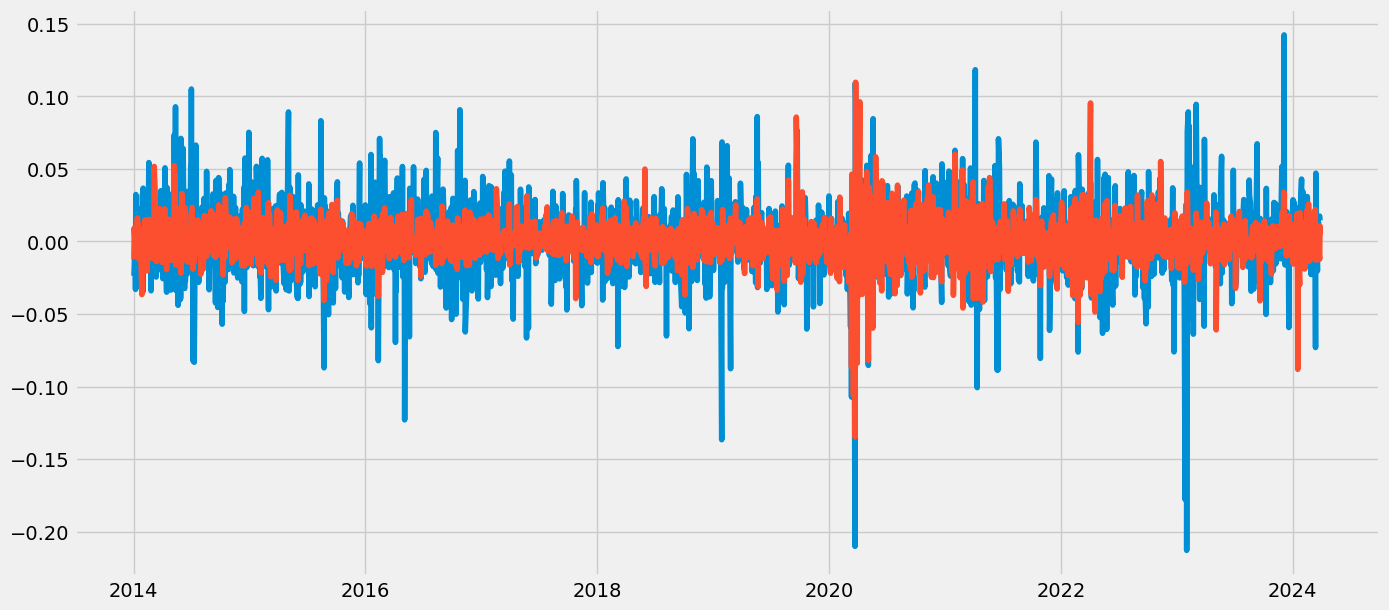

In [66]:
plt.plot(adani_ports['log_returns'])
plt.plot(hdfc['log_returns'])
plt.show()

### Stationarity Test

The hypotheses for the Augmented Dickey-Fuller (ADF) test are [2]:

1. Null hypothesis (H0): The time series is not stationary because there is a unit root (if p-value > 0.05)
2. Alternative hypothesis (H1): The time series is stationary because there is no unit root (if p-value ≤ 0.05)

In [ ]:
from statsmodels.tsa.stattools import adfuller

#TBD

### KPSS Test For Stationarity

In [ ]:
from statsmodels.tsa.stattools import kpss

#TBD
adftest = None

print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")